### 행렬의 곱

In [1]:
import numpy as np

a = np.array([1,2,3]) # 1차원 배열
b = np.array([2,2,2]) # 1차원 배열
# print(a*b)
# print(np.sum(a*b))
print(np.dot(a,b))

12


In [2]:
import numpy as np

a = np.array([[1,2,3]]) # (1,3)
print(a.shape)
b = np.array([[2],
              [2],
              [2]]) # (3,1)
print(b.shape)
c = np.dot(a,b)  # (1,3)(3,1)
print(c.shape)  
print(c)

(1, 3)
(3, 1)
(1, 1)
[[12]]


In [3]:
import numpy as np

a = np.array([[1,2,3]]) # (1,3)
print(a.shape)
b = np.array([2,2,2]) # (3,)
print(b.shape)
c = np.dot(a,b)  # (1,3)(3,)
print(c.shape)  
print(c)

(1, 3)
(3,)
(1,)
[12]


In [4]:
a = np.array([1,2,3])          # (3,)
b = np.array([[2],[2],[2]])    # (3,1)
print(np.dot(a,b))

[12]


In [5]:
a = np.array([[1,2,3],
              [4,5,6]])     # (2,3)
b = np.array([[1,2],
              [1,2],
              [1,2]])   # (3,2)
print(np.dot(a,b))

[[ 6 12]
 [15 30]]


#### 행렬 연산의 교환 법칙

In [6]:
a = np.array([[1,2,3]])     # (1,3)
b = np.array([[2],[2],[2]]) # (3,1)
c = np.dot(a,b)  # (1,3)(3,1)
print(c)

[[12]]


In [7]:
a = np.array([[1,2,3]])     # (1,3)
b = np.array([[2],[2],[2]]) # (3,1)
c = np.dot(b,a)  # (3,1)(1,3)
print(c)

[[2 4 6]
 [2 4 6]
 [2 4 6]]


### 행렬의 전치

In [8]:
a = np.array([1,2,3])
print(a)
print(a.T)
print(a.shape)
print(a.T.shape)

[1 2 3]
[1 2 3]
(3,)
(3,)


In [9]:
a = np.array([1,2,3])
print(a)
# a = a.reshape(4,1)
a = a.reshape(-1,1)
print(a)

[1 2 3]
[[1]
 [2]
 [3]]


In [10]:
a = np.array([[1,2],
              [3,4],
              [5,6]])
print(a.shape)        # (3, 2)
print(a.T.shape)      # (2, 3)
print(a.T)
print(np.transpose(a, (1,0)))

(3, 2)
(2, 3)
[[1 3 5]
 [2 4 6]]
[[1 3 5]
 [2 4 6]]


### 행렬곱의 교환 법칙

In [11]:
import numpy as np

a = np.array([[1,2,3]])     # (1,3)
b = np.array([[2],[2],[2]]) # (3,1)

c = np.dot(a,b)   # (1,3)(3,1) => (1,1)
print(c.shape)  
print(c)

c = np.dot(b,a)  # (3,1)(1,3) => (3,3)
print(c.shape)  
print(c)              

(1, 1)
[[12]]
(3, 3)
[[2 4 6]
 [2 4 6]
 [2 4 6]]


In [13]:
import numpy as np

a = np.array([[1,2,3],[4,5,6]]) # (2,3)
b = np.array([[2],[2],[2]])     # (3,1)

c = np.dot(a,b)   # (2,3)(3,1) => (2,1)
print(c.shape)  

# c = np.dot(b,a)  # (3,1)(2,3) 
# print(c.shape)  
     

(2, 1)


###  배치 경사 하강 구현

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, 
                                                            test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)
print(y_train.shape)

(364,)


In [23]:
class SingleLayer:    
    def __init__(self, learning_rate=0.1, l1=0, l2=0):
        self.w = None              # 가중치
        self.b = None              # 절편
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.w_history = []        # 가중치 기록
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z = np.dot(x, self.w) + self.b        # 선형 출력을 계산합니다.  (364,30)(30,1)=>(364,1)
        return z

    def backprop(self, x, err):
        m = len(x)
        w_grad = np.dot(x.T, err) / m         # 가중치에 대한 그래디언트를 계산합니다.    (30,364)(364,1)
        b_grad = np.sum(err) / m              # 절편에 대한 그래디언트를 계산합니다.
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)                  # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                            # 샘플 개수를 저장합니다.
        self.w = np.ones((x.shape[1], 1))     # 가중치를 초기화합니다.
        self.b = 0                            # 절편을 초기화합니다.
        self.w_history.append(self.w.copy())  # 가중치를 기록합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
#             print(x.shape)  # (364,30)
            z = self.forpass(x)               # 정방향 계산을 수행합니다.  
#             print(z.shape)  # (364,1)
            a = self.activation(z)            # 활성화 함수를 적용합니다.
#             print(a.shape)  # (364,1)
            err = a - y                      # 오차를 계산합니다.
            #    (364,1) - (364,1)
#             print(err.shape)  # (364,1)
            # 오차를 역전파하여 그래디언트를 계산합니다.
            w_grad, b_grad = self.backprop(x, err)
            # 그래디언트에서 페널티 항의 미분 값을 더합니다.
            w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
            # 가중치와 절편을 업데이트합니다.
            self.w -= self.lr * w_grad
            self.b -= self.lr * b_grad
            # 가중치를 기록합니다.
            self.w_history.append(self.w.copy())
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
#             break
    
    def predict(self, x):
        z = self.forpass(x)      # 정방향 계산을 수행합니다.
        return z > 0             # 스텝 함수를 적용합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))
    
    def reg_loss(self):
        # 가중치에 규제를 적용합니다.
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)
    
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.activation(z)             # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
        val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [25]:
single_layer = SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train, 
                 x_val=x_val_scaled, y_val=y_val, epochs=1000)
single_layer.score(x_val_scaled, y_val)

0.978021978021978

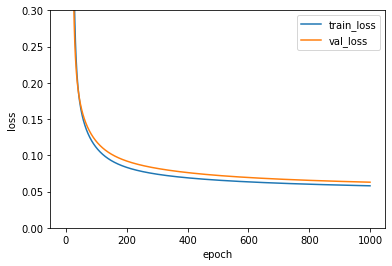

In [26]:
plt.ylim(0, 0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

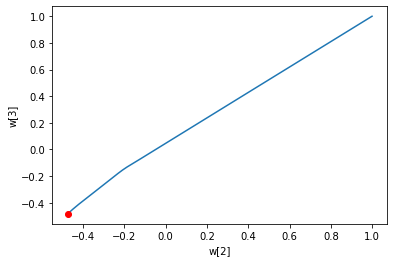

In [27]:
w2 = []
w3 = []
for w in single_layer.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

### 기본 딥러닝 구현(2층 구조)

In [28]:
class DualLayer(SingleLayer):
    
    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.activation(z1)            # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)               # 은닉층의 크기
        self.w2 = np.ones((self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)          # 타깃을 열 벡터로 바꿉니다.
        y_val = y_val.reshape(-1, 1)
        m = len(x)                    # 샘플 개수를 저장합니다.
        self.init_weights(x.shape[1]) # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            a = self.training(x, y, m)
            # 안전한 로그 계산을 위해 클리핑합니다.
            a = np.clip(a, 1e-10, 1-1e-10)
            # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
            
    def training(self, x, y, m):
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.activation(z)    # 활성화 함수를 적용합니다.
        err = (a - y)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에서 페널티 항의 미분 값을 뺍니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
    
    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

In [29]:
dual_layer = DualLayer(units=20, l2=0.01)
dual_layer.fit(x_train_scaled, y_train, 
               x_val=x_val_scaled, y_val=y_val, epochs=12000)
dual_layer.score(x_val_scaled, y_val)

0.967032967032967

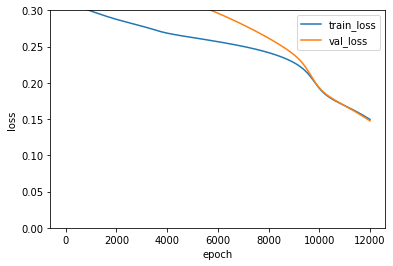

In [30]:
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [35]:
a = np.random.normal(0, 1,  (200,300))
# print(a)
print(np.mean(a))
print(np.std(a))

-0.006347429667631605
1.0003942457525077


In [36]:
class RandomInitNetwork(DualLayer):
    
    def init_weights(self, n_features):
        np.random.seed(42)
        self.w1 = np.random.normal(0, 1, 
                                   (n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)                        # 은닉층의 크기
        self.w2 = np.random.normal(0, 1, 
                                   (self.units, 1))           # (은닉층의 크기, 1)
        self.b2 = 0

In [37]:
random_init_net = RandomInitNetwork(l2=0.01)
random_init_net.fit(x_train_scaled, y_train,
                    x_val=x_val_scaled, y_val=y_val, epochs=2000)

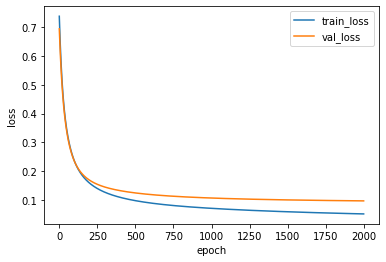

In [38]:
plt.plot(random_init_net.losses)
plt.plot(random_init_net.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

### 파이썬의 제너레이터 함수

In [39]:
def foo():
    print('foo()')
    return 10
    
c = foo()
print(c)

foo()
10


In [51]:
def foo():
    a = np.arange(100000)
    print('foo()')
    return 10
    print('after()')
    
c = foo()
print(c)

foo()
10


In [58]:
def foo():
    a = np.array([1,2,3,4,5])
    print('foo()')
    yield 10
    print('after()')
    yield 20
    
c = foo()
print(c)
# ret = next(c)
# print(ret)
# ret = next(c)
# print(ret)
# ret = next(c)
# print(ret)

for data in c:
    print(data)

<generator object foo at 0x000001F66EF092E0>
foo()
10
after()
20


In [59]:
def foo():
    a = np.array([1,2,3,4,5])
    print('foo()')
    
    for data in a:
        yield data

c = foo()
print(c)
for data in c:
    print(data)

<generator object foo at 0x000001F66EF09190>
foo()
1
2
3
4
5


In [60]:
def foo():
    print('foo()')
    for i in range(10):
        yield  (i+1)*10
    
c = foo()
print(c)
for ret in c:
    print(ret)

<generator object foo at 0x000001F66EF09270>
foo()
10
20
30
40
50
60
70
80
90
100


In [68]:
def gen_batch():
    batch_size = 16
    x = np.arange(105)
    x += 100
    length = len(x)
    bins = length // batch_size      # 미니배치 횟수
    if length % batch_size:
        bins += 1                    # 나누어 떨어지지 않을 때
    
    for i in range(bins):
        start = batch_size * i
        end   = batch_size * (i + 1)
        yield x[start:end]

In [69]:
for data in gen_batch():
    print(data)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115]
[116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131]
[132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147]
[148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163]
[164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
[180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195]
[196 197 198 199 200 201 202 203 204]


### 미니 배치 학습의 구현

In [70]:
class MinibatchNetwork(RandomInitNetwork):
    
    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
        super().__init__(units, learning_rate, l1, l2)
        self.batch_size = batch_size     # 배치 크기
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y_val = y_val.reshape(-1, 1)     # 타깃을 열 벡터로 바꿉니다.
        self.init_weights(x.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        np.random.seed(42)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            loss = 0
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            for x_batch, y_batch in self.gen_batch(x, y):
                y_batch = y_batch.reshape(-1, 1) # 타깃을 열 벡터로 바꿉니다.
                m = len(x_batch)                 # 샘플 개수를 저장합니다.
                a = self.training(x_batch, y_batch, m)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss += np.sum(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / len(x))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.

In [71]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size=64)
minibatch_net.fit(x_train_scaled, y_train, 
                  x_val=x_val_scaled, y_val=y_val, epochs=500)
minibatch_net.score(x_val_scaled, y_val)

0.978021978021978

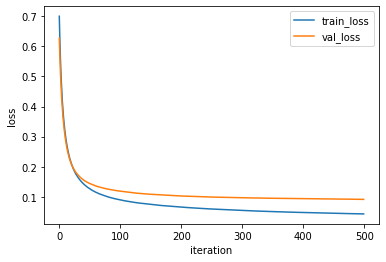

In [72]:
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()